# Algorithm k-mean 
In this exercise, we will create a k-mean model that will assign iris flowers into three species based on the measurements of the flowers.

We will be based on pre-prepared data from a previous jupyter notebook.

## Load and split data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_arrays = np.load("iris_numpy.npz")
X = my_arrays['arr_0']
Y = my_arrays['arr_1']
X_norm = my_arrays['arr_2']
X_features = my_arrays['arr_3']

Since we prepared the data using a scaler and encoder, we will need them eventually. Therefore, we will read them from the files.

In [3]:
import joblib
scaler=joblib.load('classification_std_scaler.bin')
encoder=joblib.load('classification_encoder.bin')

Displaying the mapping of the label to the iris type number from the encoder.

In [4]:
encoder_mapping = dict(enumerate(encoder.classes_))
encoder_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

Splitting of data into training and test data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X_norm, Y, test_size=0.2)

## Determining the number of k segments
The input parameter for k-means is the number of segments into which the data is to be divided. 

If the number of segments is part of the specification, as we have for kostacs, there is nothing to worry about.

But we will show a procedure to find out the optimal number of segments from the data if it is not clear how many segments to divide the data into. 

We run the k-means algorithm multiple times with different numbers of segments. For each output model, we will observe the value of inertia_ 

inertia_ is the sum of the squared distances of the samples from their nearest cluster center, weighted by the sample weights, if given.

In [6]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from collections import Counter

inertia_list = []
for num_clusters in range(1, 10):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", n_init = 10)
    kmeans_model.fit(X_norm)
    inertia_list.append(kmeans_model.inertia_)

The optimal number of segments is such that the value of _inertia changes significantly between two models with a number of segments differing by one.

This can be found, for example, by plotting the interial_ in an elbow graph. The optimal number k is at the point where the graph last significantly breaks.

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

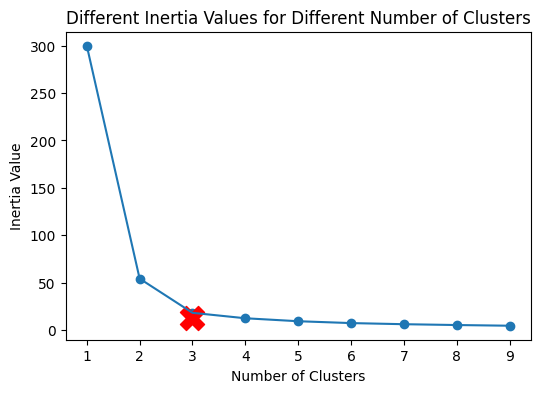

In [7]:
plt.figure(figsize=(6,4))
plt.plot(range(1,10),inertia_list)
plt.scatter(range(1,10),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Value")
plt.title("Different Inertia Values for Different Number of Clusters")

## K-mean training 
Creating and training a k-mean model

In [8]:
kmean_model = KMeans(n_clusters=3, random_state= 2, n_init=10)
y_pred = kmean_model.fit(X_train)

Center coordinate display

In [9]:
kmean_model.cluster_centers_

array([[ 1.05521083,  1.1130126 ],
       [-1.30637754, -1.25022826],
       [ 0.27103756,  0.16029391]])

## Model prediction
Running the mnodel on training and test data.

In [10]:
Y_pred_train = kmean_model.predict(X_train)
Y_pred_test = kmean_model.predict(X_test)

In [11]:
print (Y_pred_train)

[1 1 2 1 1 2 0 1 0 1 2 2 0 0 1 0 0 2 0 2 0 2 0 1 1 1 0 2 0 0 1 0 1 2 2 0 1
 2 2 1 0 1 2 0 1 2 0 0 1 0 1 1 0 2 1 0 2 1 0 0 1 1 1 1 1 1 1 0 1 2 2 2 2 0
 1 1 1 0 2 0 1 0 2 0 0 2 0 0 2 1 0 0 0 0 2 1 2 0 2 1 2 1 1 1 2 2 1 2 0 2 2
 1 1 0 0 0 2 1 1 0]


K-mean chooses the cluster id randomly. This numbering does not have to match the value of the iris type as chosen by the label encoder.

To determine the accuracy of the cluster, we will need to match the cluster id returned by k-mean with the cluster id chosen by label_encoded.

In the Y_train_pred variable we have the k-mean cluster numbers.

We have the correct answers in the Y_train field - the encoding is according to the encoder.

In [12]:
Y_train

array([0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1,
       2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 2, 2, 1, 1, 0, 0, 1])

The mapping is created as follows.

Go through all three clusters (0, 1, 2).

The ``mask = (y_train_pred == cluster)`` creates a logical mask (True/False) that tells which samples from the training data belong to the cluster currently being traversed.

The ``y_train[mask]`` selects the true (correct) classes of only those samples that k-means has included in the current cluster.

The ``mode(Y_train[mask], keepdims=True).mode[0]`` finds the most frequent class (mode) among those samples. 

The ``labels_map[cluster]`` most frequent class is stored in the mapping dictionary.

In [13]:
labels_map = {}
for cluster in range(3):
    mask = (Y_pred_train == cluster)
    labels_map[cluster] = mode(Y_train[mask], keepdims=True).mode[0]

Mapping cluster id to class id

In [14]:
labels_map

{0: np.int64(2), 1: np.int64(0), 2: np.int64(1)}

Complete mapping

In [15]:
for id in range (0,3):
    print (f"Cluster id {id}, encoding id: {labels_map[id]}, label: {encoder_mapping[labels_map[id]]}")

Cluster id 0, encoding id: 2, label: Iris-virginica
Cluster id 1, encoding id: 0, label: Iris-setosa
Cluster id 2, encoding id: 1, label: Iris-versicolor


Remapping the result from the cluster id to the correct label_encoder response.

In [16]:
for i in range(Y_pred_train.shape[0]):
    Y_pred_train[i]=labels_map[Y_pred_train[i]]
    
for i in range(Y_pred_test.shape[0]):
    Y_pred_test[i]=labels_map[Y_pred_test[i]]    

In [17]:
Y_pred_test

array([2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

## Visualization of the model
Create two graphs. One will contain the predictions, the other the reality.

Charts for training data

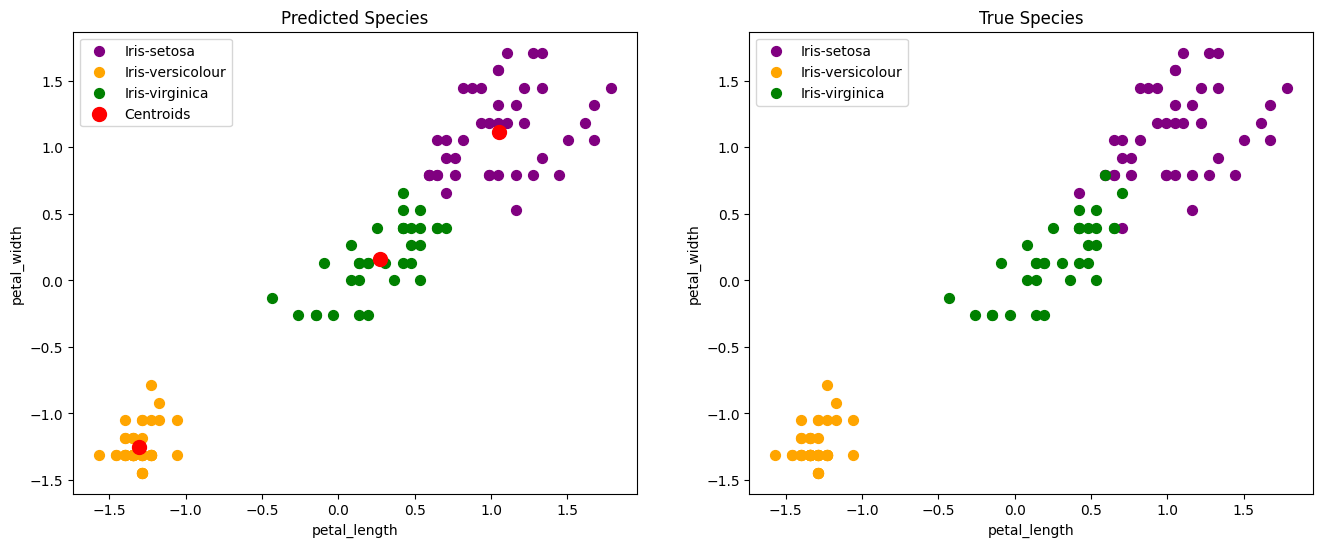

In [18]:
plt.figure(figsize=(16,6))

# prediction
plt.subplot(1,2,1)
plt.scatter(X_train[Y_pred_train == labels_map[0], 0], X_train[Y_pred_train == labels_map[0], 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[Y_pred_train == labels_map[1], 0], X_train[Y_pred_train == labels_map[1], 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[Y_pred_train == labels_map[2], 0], X_train[Y_pred_train == labels_map[2], 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('Predicted Species'); plt.xlabel('petal_length'); plt.ylabel('petal_width')
# centroid
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

# real values
plt.subplot(1,2,2)
plt.scatter(X_train[Y_train == labels_map[0], 0], X_train[Y_train == labels_map[0], 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[Y_train == labels_map[1], 0], X_train[Y_train == labels_map[1], 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[Y_train == labels_map[2], 0], X_train[Y_train == labels_map[2], 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('True Species'); plt.xlabel('petal_length'); plt.ylabel('petal_width')

plt.legend()

Graphs for test data

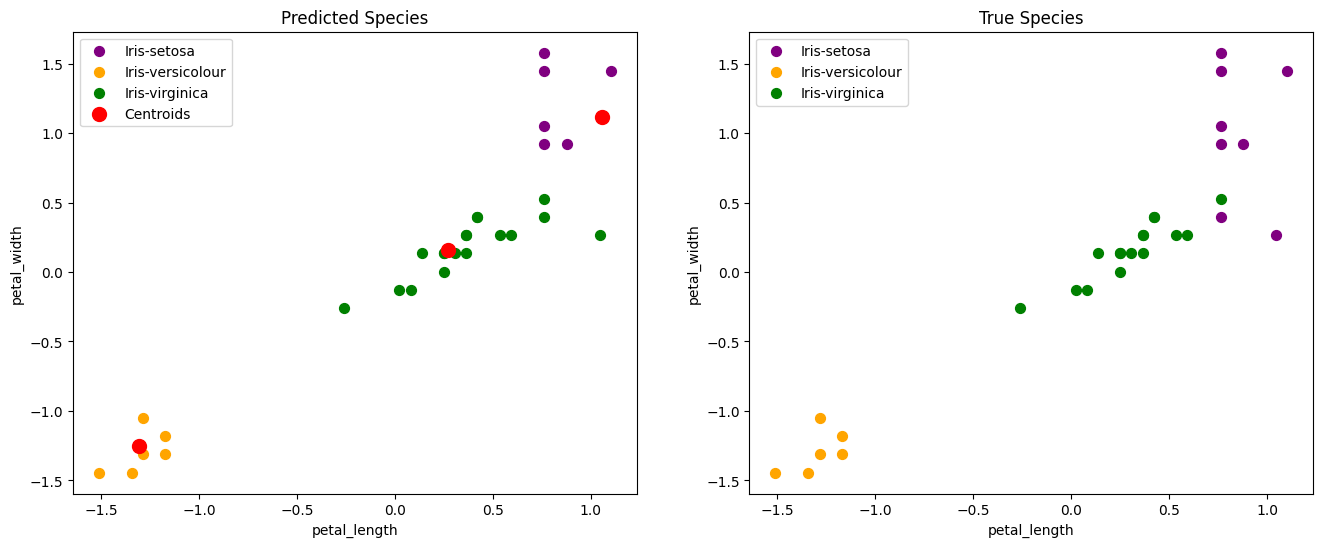

In [19]:
plt.figure(figsize=(16,6))

# prediction
plt.subplot(1,2,1)
plt.scatter(X_test[Y_pred_test == labels_map[0], 0], X_test[Y_pred_test == labels_map[0], 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_test[Y_pred_test == labels_map[1], 0], X_test[Y_pred_test == labels_map[1], 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_test[Y_pred_test == labels_map[2], 0], X_test[Y_pred_test == labels_map[2], 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('Predicted Species'); plt.xlabel('petal_length'); plt.ylabel('petal_width')
# centroid
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

# real values
plt.subplot(1,2,2)
plt.scatter(X_test[Y_test == labels_map[0], 0], X_test[Y_test == labels_map[0], 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_test[Y_test == labels_map[1], 0], X_test[Y_test == labels_map[1], 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_test[Y_test == labels_map[2], 0], X_test[Y_test == labels_map[2], 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('True Species'); plt.xlabel('petal_length'); plt.ylabel('petal_width')
plt.legend()

## Evaluation of the model

- accuracy = number of correct answers / number of answers
- true positive rates (recall, specificity) = TP / (TP + FN) patient has the disease and has been well diagnosed
- true negative rates (sensitivity) = TN / (TN + FP) the patient does not have the disease and has been well diagnosed
- precision (positive predictive values) = TP / (TP + TN) precision rate when diagnosed as positive
- F measure (harmonic mean of precision and recall) = 2 * (precision * recall) / (precision + recall)
- accurary = (TP + TN) / (N + P)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

Predictions for the test data we have already calculated from the visualization.

In [21]:
Y_pred_test

array([2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

Confusion matrix

<Axes: >

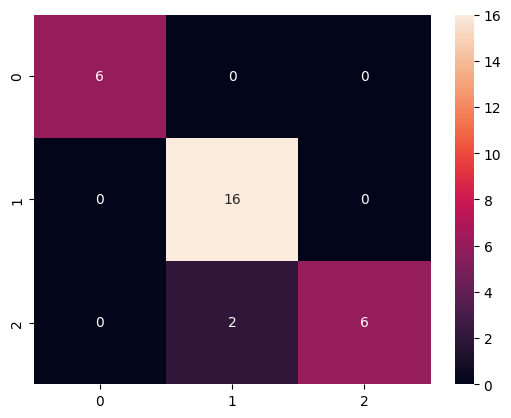

In [22]:
cf_matrix=confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cf_matrix, annot=True)

Accuracy of model

In [23]:
accuracy=accuracy_score(Y_test, Y_pred_test)
print (accuracy)

0.9333333333333333


## Storing the model
The model can again be saved to a file for use in inference.

In [24]:
import pickle
filename = 'kmean_model.sav'
pickle.dump(kmean_model, open(filename, 'wb'))

In [25]:
loaded_model = pickle.load(open(filename, 'rb'))

## Tuning hyperparameters
The k-means algorithm has different parameters. One of them is how the distance is measured.

The following procedure lists the best combination of parameters for the given data.

In [26]:
from sklearn.model_selection import GridSearchCV

select_params={
               'algorithm' :["lloyd", "elkan"],
              }

grid_kmean = GridSearchCV(kmean_model, select_params, cv=5)
grid_kmean.fit(X_norm)

print('Best parameters: {}'.format(grid_kmean.best_params_))
print('Best score on training set: {}'.format(grid_kmean.best_score_))

Best parameters: {'algorithm': 'lloyd'}
Best score on training set: -3.8005881736277587


## Creating a model from a predefined variable

Create a new model that will use only one artificial variable according to the formula pental_width * pental_height.

Division of data into training and test data. The library assumes that X has multiple variables, so we have to use reshape.

In [27]:
from sklearn.model_selection import train_test_split
X_feature_train, X_feature_test, Y_feature_train, Y_feature_test = train_test_split (X_features.reshape(-1,1), Y, test_size=0.2)

In [28]:
kmeanf_model = KMeans(n_clusters=3, random_state= 2, n_init=10)
kmeanf_model.fit(X_feature_train)

KMeans(n_clusters=3, n_init=10, random_state=2)

New model, new search cluster id on labels.

In [29]:
Y_feature_pred_train = kmeanf_model.predict(X_feature_train)
Y_feature_pred_test = kmeanf_model.predict(X_feature_test)

labels_feature_map = {}
for cluster in range(3):
    mask = (Y_feature_pred_train == cluster)
    labels_feature_map[cluster] = mode(Y_feature_train[mask], keepdims=True).mode[0]

In [30]:
for id in range (0,3):
    print (f"Cluster id {id}, encoding id: {labels_feature_map[id]}, label: {encoder_mapping[labels_feature_map[id]]}")

Cluster id 0, encoding id: 2, label: Iris-virginica
Cluster id 1, encoding id: 0, label: Iris-setosa
Cluster id 2, encoding id: 1, label: Iris-versicolor


Remapping the result from the cluster id to the correct label_encoder response.

In [31]:
for i in range(Y_feature_pred_train.shape[0]):
    Y_feature_pred_train[i]=labels_map[Y_feature_pred_train[i]]
    
for i in range(Y_feature_pred_test.shape[0]):
    Y_feature_pred_test[i]=labels_map[Y_feature_pred_test[i]] 

<Axes: >

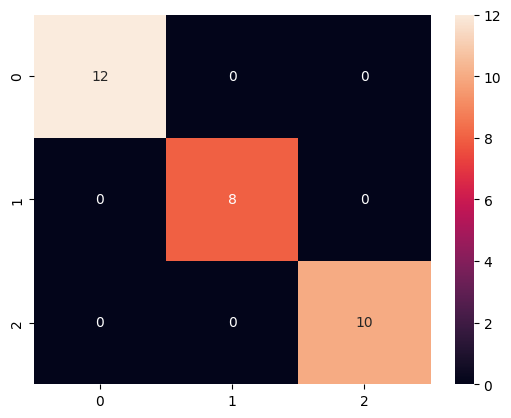

In [32]:
cf_matrix=confusion_matrix(Y_feature_test, Y_feature_pred_test)
sns.heatmap(cf_matrix, annot=True)

The score is slightly lower than the two-variable model, but still relatively high.

In [33]:
accuracy_score(Y_feature_test, Y_feature_pred_test)

1.0

Display of the model result compared against reality.

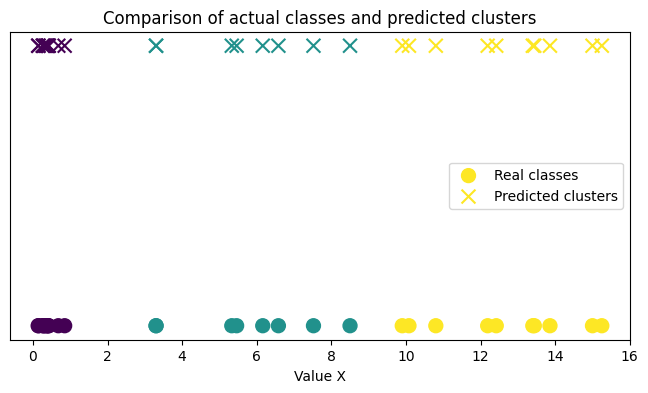

In [34]:
X = X_feature_test 
y_true = Y_feature_test
y_pred = Y_feature_pred_test

plt.figure(figsize=(8, 4))
plt.scatter(X, np.zeros_like(X), c=y_true, cmap='viridis', s=100, marker='o', label='Real classes')

plt.scatter(X, np.ones_like(X)*0.1, c=y_pred, cmap='viridis', s=100, marker='x', label='Predicted clusters')

plt.yticks([]) 
plt.xlabel('Value X')
plt.legend()
plt.title('Comparison of actual classes and predicted clusters')
plt.show()